# User Availability

In [5]:
import pandas as pd

# load data
Questions2012 = pd.read_csv('../../../160-Stackoverflow-Data/train_test/X_train.csv' ,\
                    dtype = {'LastEditorDisplayName': str, 'Tags': str})
Answers2012 = pd.read_csv('../../../160-Stackoverflow-Data/train_test/raw_query/Posts.csv' ,\
                          dtype = {'LastEditorDisplayName': str, 'Tags': str})
Answers2012 = Answers2012.loc[Answers2012.PostTypeId == 2]
Users = pd.read_csv('../../../160-Stackoverflow-Data/train_test/raw_query/Users.csv')

# data preprocessing
Questions2012['CreationDate'] = pd.to_datetime(Questions2012['CreationDate'], format="%Y-%m-%dT%H:%M:%S")
Answers2012['CreationDate'] = pd.to_datetime(Answers2012['CreationDate'], format="%Y-%m-%dT%H:%M:%S")
Users['CreationDate'] = pd.to_datetime(Users['CreationDate'], format="%Y-%m-%dT%H:%M:%S")


def user_avail(user_id):
    """
    :param user_id: int - userId
    :return: pd.Series - frequency of user activities
    """
    user_questions = Questions2012.loc[(Questions2012.OwnerUserId == user_id),['CreationDate']]
    user_answers = Answers2012.loc[Answers2012.OwnerUserId == user_id, ['CreationDate']]
    user_activities = user_questions.append(user_answers)
    return user_activities['CreationDate'].dt.hour.value_counts()

C:\Users\maksi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Hour of the Day'),
 Text(0.5,1,'Active Hours for User 23')]

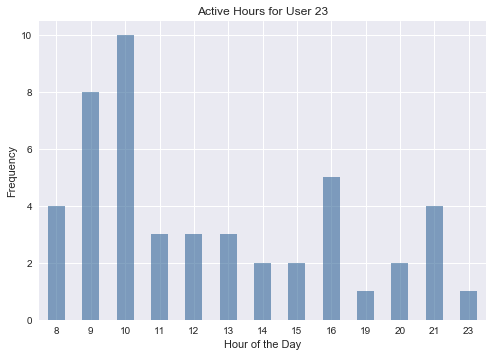

In [11]:
# example
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plt.style.use(style_name)
user23_avail = user_avail(304)
ax = user23_avail.sort_index().plot.bar(color=(0.2, 0.4, 0.6, 0.6))
ax.set_xticklabels(labels=user23_avail.sort_index().index, rotation=0, fontsize=10)
ax.set(xlabel='Hour of the Day', ylabel='Frequency', 
        title='Active Hours for User 23')